In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
import statsmodels.api as smod

### 1)

In [2]:
test_data = np.genfromtxt('/data9/UN3400/data/brf_temp.txt', 
                          delimiter='\t')
data = test_data

### 2) & 3)

In [3]:
N, i = np.shape(data)

#time
t = data[:,0:1]
#data observed
dobs = data[:,1:2]

Making G

In [5]:
#Using p as a constant for shorter code
p = (2 * np.pi)/365.5

M = 3
G = np.zeros((N,M))
G[:, 0] = np.cos(p * t).flatten() #a
G[:, 1] = np.sin(p * t).flatten() #b
G[:, 2] = np.ones(N) #c

$G \cdot G^T$
$G^T \cdot d^{obs} , m^{est}$

In [21]:
#G * transpose(G)
GTG = np.matmul(G.T,G)
#transpose(G) * d_obs
GTd = np.matmul(G.T,dobs)
mest = np.linalg.lstsq(GTG,GTd,rcond=None)[0]   
mest_f = mest.flatten()
a = mest_f[0]
b = mest_f[1]
c = mest_f[2]

In [22]:
dpre = np.matmul(G,mest)
#error
e = dobs - dpre
#variance
sigmad2 = np.matmul(e.T,e)/(N-M)
#Covariance
Cd = sigmad2 * np.linalg.inv(GTG)
#95% CI
sm = np.sqrt( np.diag(Cd).reshape(-1,1) )

In [23]:
print("Estimated standard deviation of the data: ", np.sqrt(sigmad2))

print("Estimated solution of model parameters:")
for k in range(M):
    print(f"Model parameter {k}: {mest[k, 0]:.4f} +/- {2.0 * sm[k, 0]:.4f}")

Estimated standard deviation of the data:  [[4.9948693]]
Estimated solution of model parameters:
Model parameter 0: -11.5964 +/- 0.1514
Model parameter 1: -4.2442 +/- 0.1536
Model parameter 2: 9.0336 +/- 0.1079


In [27]:
#Optimize a curve using the given solution form

#Using p as a constant for shorter code
p = (2 * np.pi)/365.5
def sinfunc(t, a, b,c):
    y = a * np.cos(p * t) + b * np.sin(p * t) + c
    return y

dpre_s = optimize.curve_fit(sinfunc, xdata = test_data[:,0], 
                             ydata = test_data[:,1])[0]
a_check = dpre_s[0]
b_check = dpre_s[1]
c_check = dpre_s[2]

print("Comparing results from LS to Scipy:")
print(f"a from LS: {a:.4f}, a from scipy: {a_check:.4f}")
print(f"b from LS: {b:.4f}, b from scipy: {b_check:.4f}")
print(f"c from LS: {c:.4f}, c from scipy: {c_check:.4f}")

Comparing results from LS to Scipy:
a from LS: -11.5964, a from scipy: -11.5964
b from LS: -4.2442, b from scipy: -4.2442
c from LS: 9.0336, c from scipy: 9.0336


### 4)

In [28]:
d = (a**2 + b**2)**.5
d

12.348645054967358

### 5)

In [29]:
time_max = t[np.argmax(dobs)]
print('Max temp is {:.2f} and occurs on day {}'.format(dobs.max(), time_max[0]))

Max temp is 33.53 and occurs on day 195.58333


### 6)

Text(0.5, 1.0, 'Prediction error')

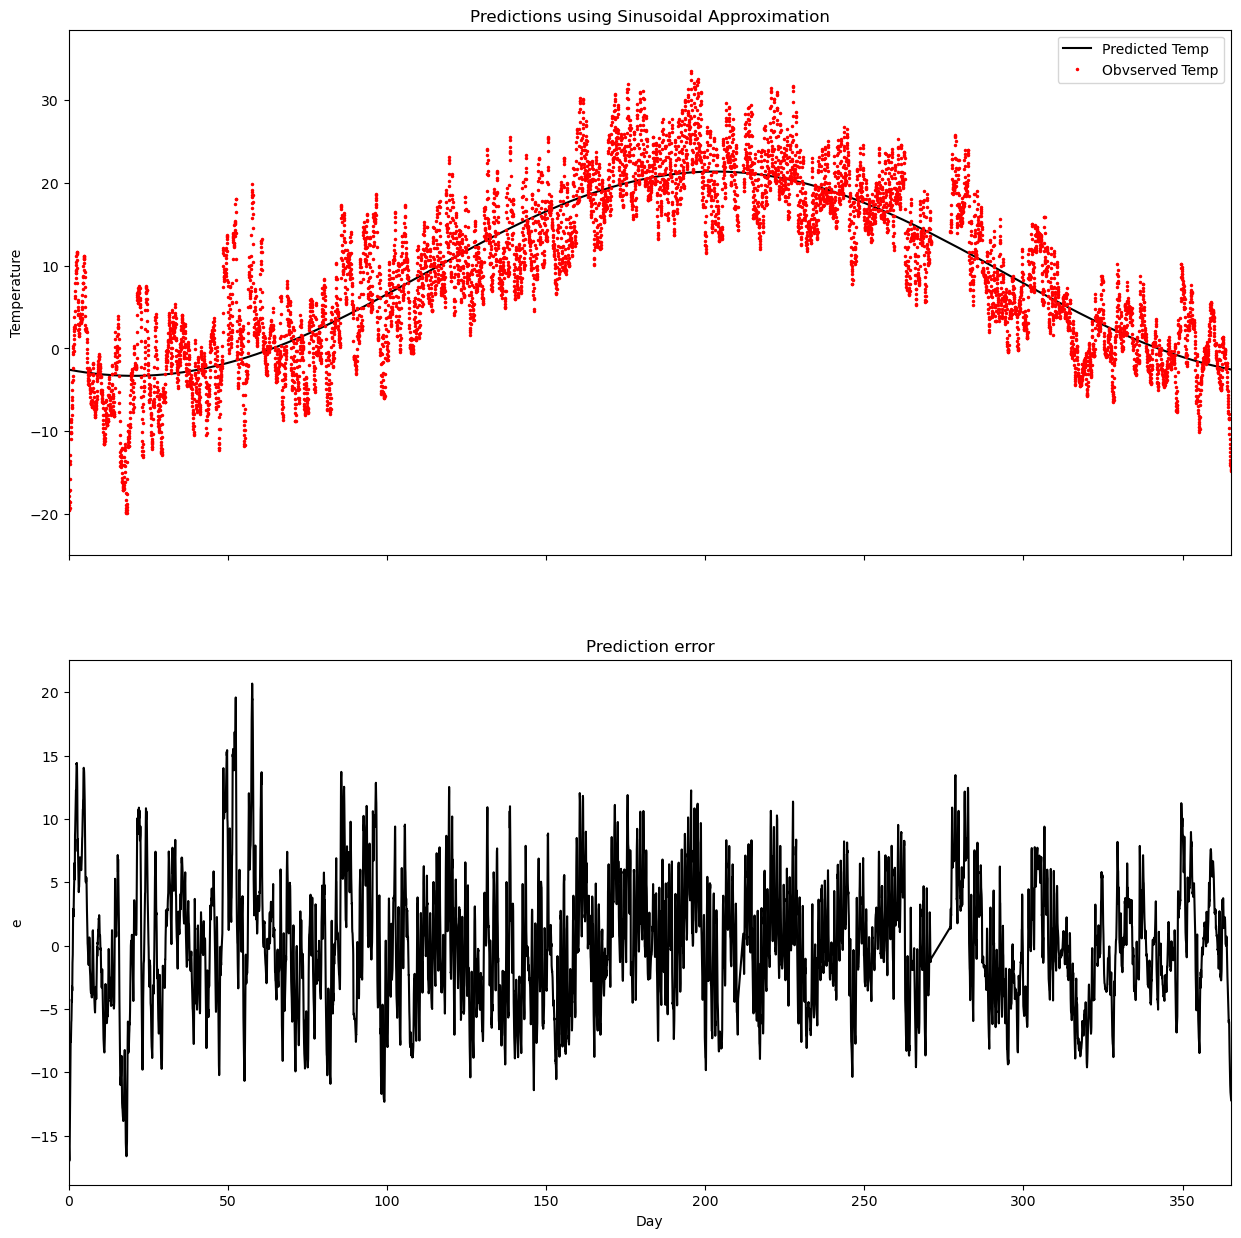

In [49]:
sin_pre = a * np.cos(p * t) + b * np.sin(p * t) + c

fig,ax = plt.subplots(ncols=1,nrows=2,figsize=(15,15), sharex=True)
ax[0].axis([np.min(t), np.max(t), np.min(dobs) - 5,np.max(dobs) + 5] )
ax[0].plot(t,sin_pre, 'k-', label='Predicted Temp')
ax[0].plot(t,dobs,'ro', markersize = 1.5, label = 'Obvserved Temp')
ax[0].set_ylabel('Temperature')
ax[0].legend()
ax[0].set_title('Predictions using Sinusoidal Approximation') 

ax[1].set_xlabel('Day')
ax[1].set_xlim([np.min(t), np.max(t)])
ax[1].plot(t,e,'k-', markersize=1.5)
ax[1].set_ylabel('e')
ax[1].set_title('Prediction error')